## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database);

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

You will need to have tensorflow installed. It is recommended that you use pip to install this library. 

```bash
pip install tensorflow
pip install tensorflow_datasets
```

> 🧠
>  You can control the verbosity of TensorFlow logs by setting the `TF_CPP_MIN_LOG_LEVEL` environment variable.
> ```python
> # import os
> # os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # set to 0 to see all logs, 4 to see only errors
> ```

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

epoch_num = 4


In [2]:
import tensorflow as tf
from tensorflow import keras  # see https://www.tensorflow.org/install
import tensorflow_datasets as tfds # see https://www.tensorflow.org/datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

tf.__version__

'2.16.1'

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(len(X_train), X_train.shape)
print(len(y_train), y_train.shape)
print(len(X_test), X_test.shape)
print(len(y_test), y_test.shape)

60000 (60000, 28, 28)
60000 (60000,)
10000 (10000, 28, 28)
10000 (10000,)


In [5]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [6]:
np. set_printoptions(linewidth=120) # increase output display width (so it's easier to read the 28x28 arrays below)

print(X_train[0]) # display the data for the first image in our training set
print(f'\nThe label for this image is {y_train[0]:d}') # display the label for the first image in our training set1
print("Input shape is", X_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

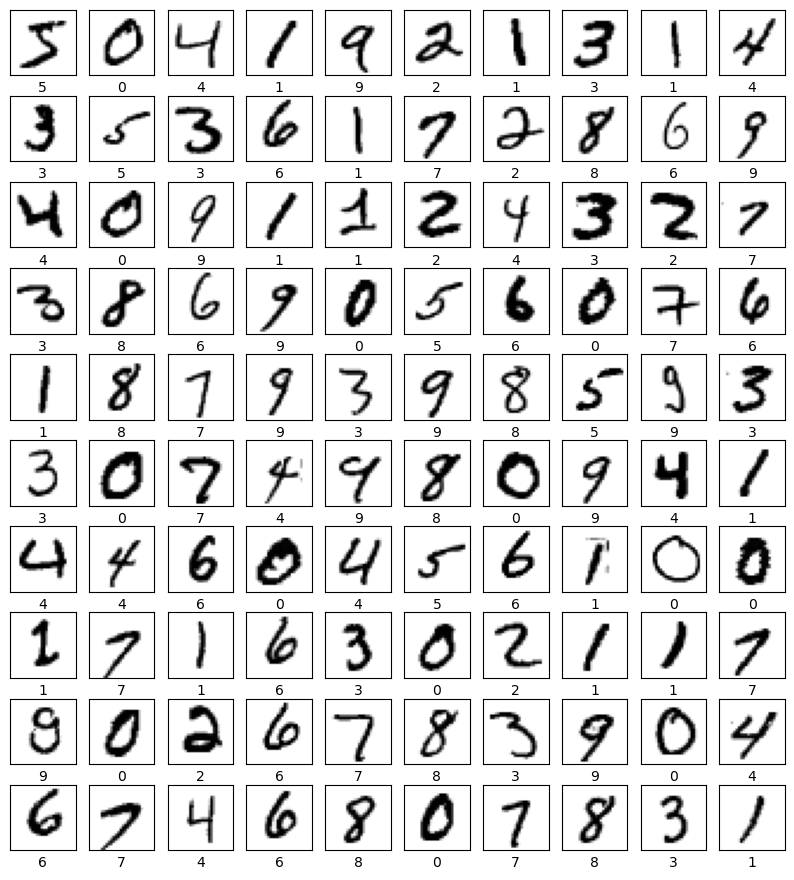

In [7]:
plt.figure(figsize=(10,11)) # make the figure a little taller than wide - to accommodate the labels
i = 0
#for image, label in mnist_train.take(5):
for i, image in enumerate(X_train[0:100]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Deep Network

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
%%time
# create model structure
deep_model = keras.models.Sequential()
deep_model.add(keras.layers.Flatten())
#deep_model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))

#deep_model.add(keras.layers.Input(shape=(28, 28)))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 
deep_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

CPU times: user 44.9 ms, sys: 34.7 ms, total: 79.5 ms
Wall time: 88.9 ms


In [10]:
%%time

# fit the model
history = deep_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epoch_num, batch_size=100
)

# 
deep_model.summary()

Epoch 1/4
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7052 - loss: 5.3263 - val_accuracy: 0.8984 - val_loss: 0.4441
Epoch 2/4
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9068 - loss: 0.3824 - val_accuracy: 0.9267 - val_loss: 0.2925
Epoch 3/4
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9359 - loss: 0.2380 - val_accuracy: 0.9337 - val_loss: 0.2637
Epoch 4/4
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9514 - loss: 0.1771 - val_accuracy: 0.9429 - val_loss: 0.2356


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (100, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (100, 64)              │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (100, 10)              │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,632 (693.88 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 118,422 (462.59 KB)

CPU times: user 23.8 s, sys: 10.7 s, total: 34.5 s
Wall time: 22.6 s


In [11]:
%%time

# evaluate the model

val_loss, val_accuracy = deep_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.2355
Validation accuracy: 0.9429
CPU times: user 840 ms, sys: 478 ms, total: 1.32 s
Wall time: 1.39 s


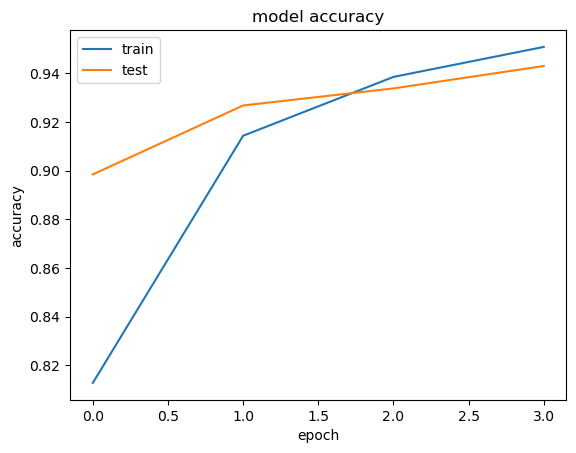

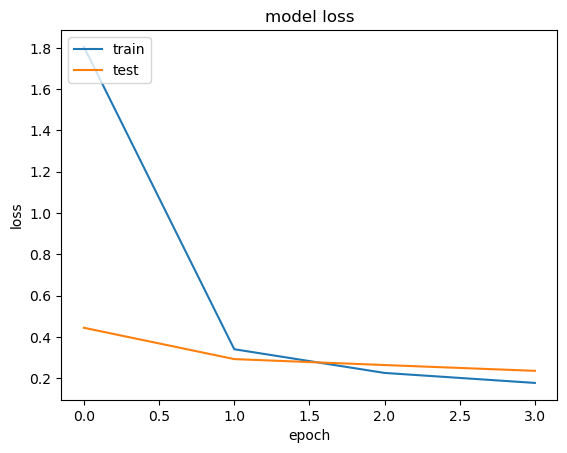

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


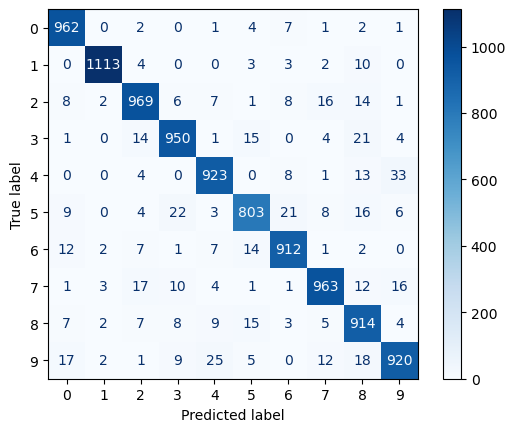

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = deep_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
y_val = deep_model.predict(X_test)
y_pred = deep_model.predict(X_test).argmax(axis=1)

for i in range(20):
    with np.printoptions(precision=8, suppress=True):
#        print(y_pred[i], y_pred[i].argmax(axis=1))
        print(y_val[i], y_pred[i] )


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.         0.         0.00000723 0.0000061  0.         0.00000091 0.         0.9999851  0.         0.00000066] 7
[0.00019991 0.00000001 0.99587196 0.00000373 0.00000036 0.00382157 0.00002074 0.00000032 0.00008127 0.        ] 2
[0.         0.99999726 0.00000001 0.00000001 0.0000022  0.         0.         0.0000001  0.00000019 0.00000024] 1
[0.9997029  0.         0.00029713 0.00000002 0.00000001 0.00000003 0.         0.         0.         0.        ] 0
[0.00005813 0.00000478 0.00028373 0.00003462 0.9971523  0.00096944 0.00007539 0.0003071  0.00068755 0.0004269 ] 4
[0.         0.99775773 0.00001732 0.00017662 0.00000001 0.00000029 0.00000221 0.00175074 0.00029429 0.00000096] 1
[0.         0.00001303 0.00006314 0.0000132  0.99356294 0.00000097 0.00000001 0.00001364 0.00628168 0.00005146] 4
[0.         0.00000335 0.00000046 0.00000241 0.00236166 0.00018549 0.         0.00001029 0.00009509 0.9973412 ] 9
[0.   